In [7]:
#Question 1 : Simple Forecast Using Moving Average
#Predict the next value using the last 12-month average.
# : https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

plt.style.use("seaborn-v0_8")

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:

#Predict the next value using the last 12-month average.
last_12_month_avg = df["Passengers"].tail(12).mean()
print("Forecast for next month (12-month moving average):", round(last_12_month_avg, 2))

Forecast for next month (12-month moving average): 476.17


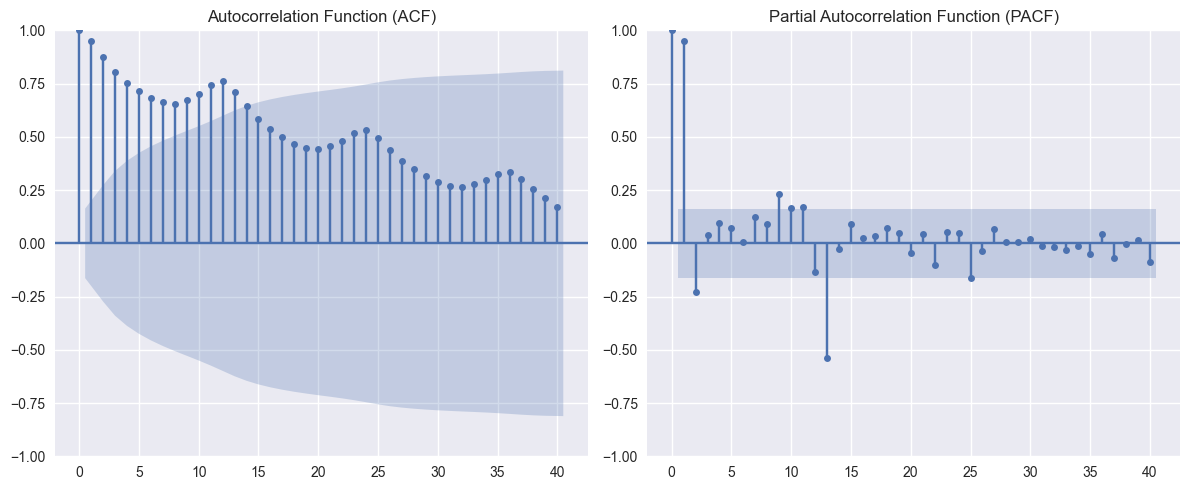

In [9]:
#Question 2 : Autocorrelation and Partial Autocorrelation
#Plot ACF and PACF to determine seasonality.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_acf(df["Passengers"], lags=40, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(df["Passengers"], lags=40, ax=plt.gca(), method="ywm")
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


In [10]:
#Question 3 : Fit ARIMA Model and Forecast
#Fit an ARIMA model to the series and forecast the next 12 months.
model = ARIMA(df["Passengers"], order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())


c:\Users\BALAJI MURUGAN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BALAJI MURUGAN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BALAJI MURUGAN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 20 Jan 2026   AIC                           1353.347
Time:                        20:45:00   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.795      0.0

c:\Users\BALAJI MURUGAN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
forecast = model_fit.forecast(steps=12)

forecast_index = pd.date_range(
    start=df.index[-1] + pd.offsets.MonthBegin(),
    periods=12,
    freq="MS"
)

forecast_series = pd.Series(forecast, index=forecast_index)


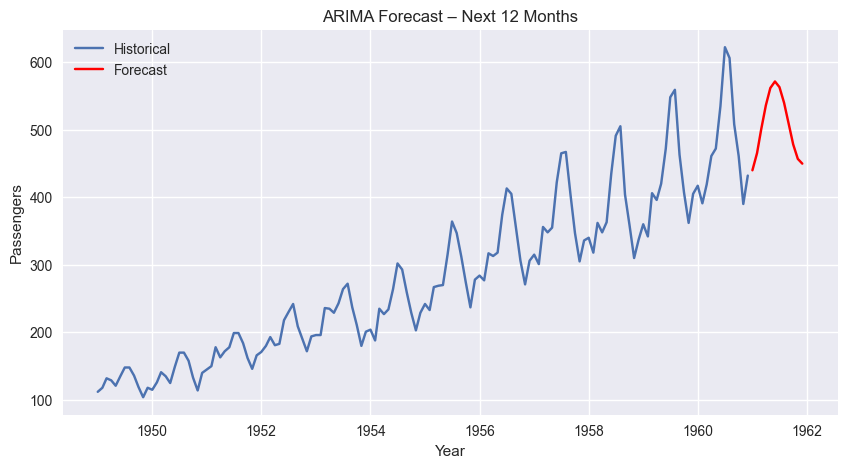

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df["Passengers"], label="Historical")
plt.plot(forecast_series, label="Forecast", color="red")
plt.title("ARIMA Forecast – Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [ ]:
#Question 4 : Load and Visualize the Dataset
#Load the dataset and plot the time series.
#Dataset : https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
temp_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
temp_df = pd.read_csv(temp_url)

temp_df["Date"] = pd.to_datetime(temp_df["Date"])
temp_df.set_index("Date", inplace=True)

temp_df.head()


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


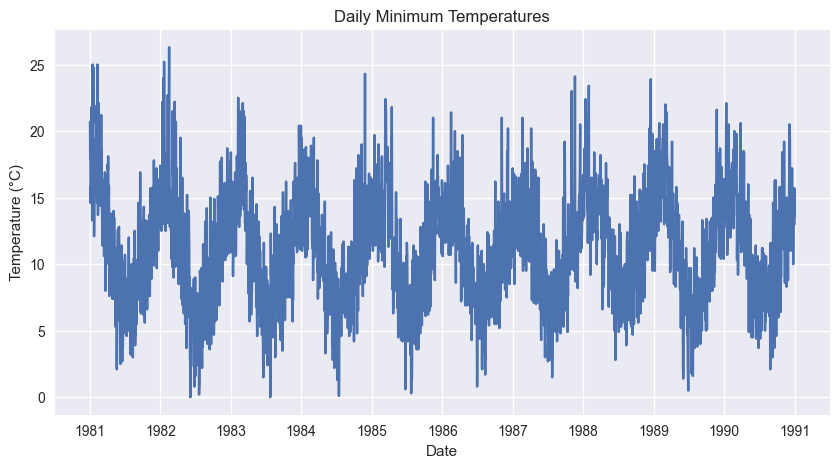

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(temp_df["Temp"])
plt.title("Daily Minimum Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


In [15]:
#Question 5 : Check for Seasonality with Monthly Mean
#Calculate the average temperature for each month.
monthly_mean = temp_df.groupby(temp_df.index.month)["Temp"].mean()

monthly_mean.index = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

monthly_mean


Jan    15.030323
Feb    15.373759
Mar    14.565484
Apr    12.088333
May     9.866452
Jun     7.278333
Jul     6.692581
Aug     7.891290
Sep     8.976333
Oct    10.309355
Nov    12.479667
Dec    13.851948
Name: Temp, dtype: float64

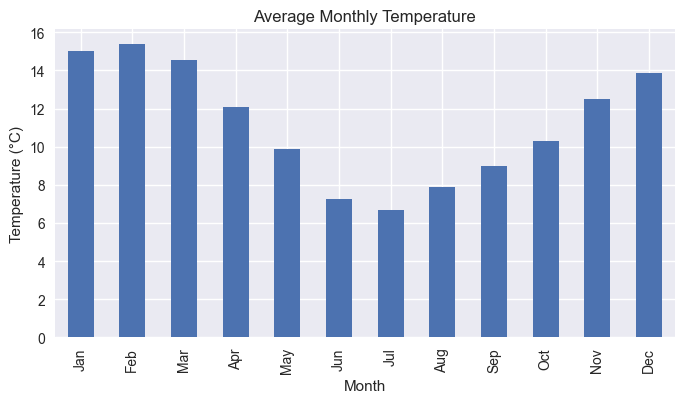

In [16]:
plt.figure(figsize=(8, 4))
monthly_mean.plot(kind="bar")
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()
